<a href="https://colab.research.google.com/github/aditi17goel/Snippets/blob/master/HS302_Assignment1_1901CS04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Name: Aditi Goel
* Roll Number: 1901CS04

In [56]:
!pip install yfinance

In [57]:
import yfinance as yf
from datetime import date,datetime, timedelta
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import numpy as np
import seaborn as sns
from tqdm import tqdm
import pandas as pd
from statsmodels.tools.sm_exceptions import ValueWarning, HessianInversionWarning, ConvergenceWarning

## Getting data, stock chosen is HDFCBANK

In [58]:
tickerSymbol = 'HDFCBANK.NS'
data = yf.Ticker(tickerSymbol)

In [59]:
prices = data.history(start=(date.today() - timedelta(days=120)), end=date.today()).Close
returns = prices.pct_change().dropna() 
diffreturns = returns.diff(periods = 1).dropna()    # creating first difference in returns

Text(0, 0.5, 'Prices')

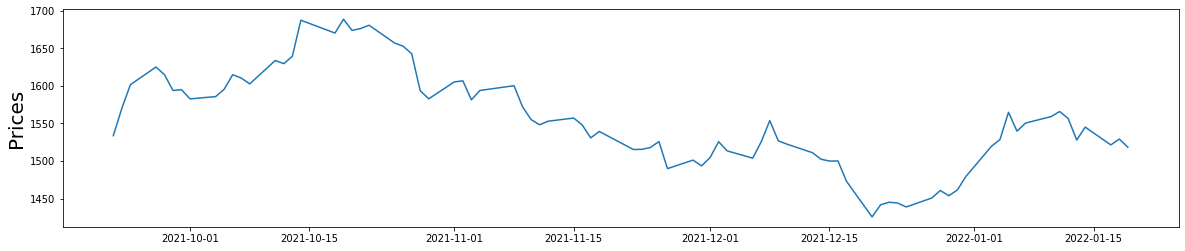

In [60]:
plt.figure(figsize=(20,4))
plt.plot(prices)
plt.ylabel('Prices', fontsize=20)

Text(0, 0.5, 'Difference of Return')

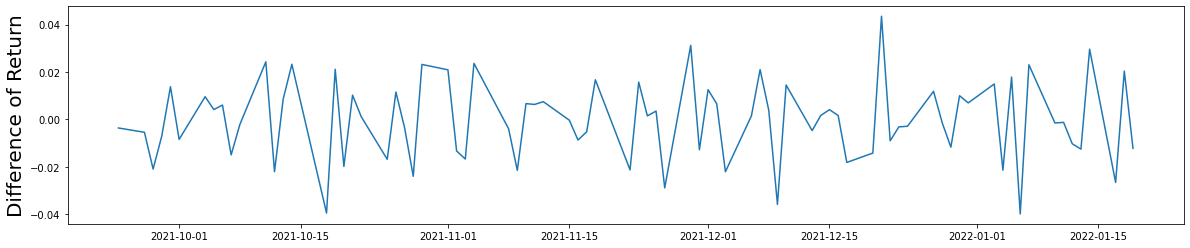

In [61]:
plt.figure(figsize=(20,4))
plt.plot(diffreturns)
plt.ylabel('Difference of Return', fontsize=20)

* Since we are taking difference of returns, d = 1

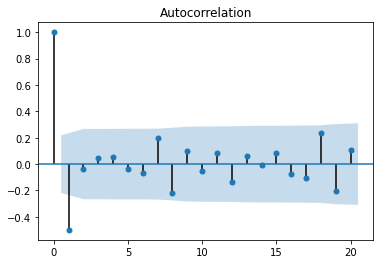

In [62]:
plot_acf(diffreturns)
plt.show()

* Last significant line outside confidence zone is at 1, therefore q = 3

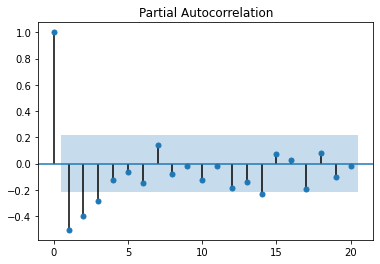

In [63]:
plot_pacf(diffreturns)
plt.show()

* Last significant line outside confidence zone is at 3, therefore p = 3

# ARIMA(3,1,1) Model

In [64]:
model = ARIMA(diffreturns, order = (3,1,1)).fit()
print(model.summary())


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                   80
Model:                 ARIMA(3, 1, 1)   Log Likelihood                 230.344
Method:                       css-mle   S.D. of innovations              0.013
Date:                Thu, 20 Jan 2022   AIC                           -448.688
Time:                        05:30:38   BIC                           -434.396
Sample:                             1   HQIC                          -442.958
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const          1.446e-05   2.43e-05      0.595      0.554   -3.32e-05    6.21e-05
ar.L1.D.Close    -0.7945      0.108     -7.353      0.000      -1.006      -0.583
ar.L2.D.Close    -0.5685      0.124     

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:668: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:669: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()


In [65]:
#get forecast
future = 5
lastprice = prices[-1]
lastreturn =returns[-1]
# values of first array are the forecast
forecast = model.forecast(steps = future)
for i in range(0,future):
    returni = lastreturn - forecast[0][i]
    pricei = lastprice*(1 + returni)
    lastprice=pricei
    lastreturn=returni
    print("Day {} HDFCBANK".format(i+1))
    print("Predicted value of difference of returns {}. Predicted stock price : {} ".format(forecast[0][i],pricei))
    



Day 1 HDFCBANK
Predicted value of difference of returns 0.006370092096734531. Predicted stock price : 1498.0535096828685 
Day 2 HDFCBANK
Predicted value of difference of returns -0.002950976476003767. Predicted stock price : 1482.3517622143431 
Day 3 HDFCBANK
Predicted value of difference of returns 0.003081779480144867. Predicted stock price : 1462.2463103164955 
Day 4 HDFCBANK
Predicted value of difference of returns -0.0015643294281078197. Predicted stock price : 1444.700987868801 
Day 5 HDFCBANK
Predicted value of difference of returns 0.0013470517200361528. Predicted stock price : 1425.420102742343 
